# Matplotlib 学习
***
**[Matplotlib 官网](https://matplotlib.org/)**  
**[Matplotlib 菜鸟教程](http://www.runoob.com/numpy/numpy-matplotlib.html)**  
**[Morven Matplotlib 教学](https://morvanzhou.github.io/tutorials/data-manipulation/plt/)**


# Matplotlib 基本使用
***
常用的几个基本操作在下面的代码里进行展示。

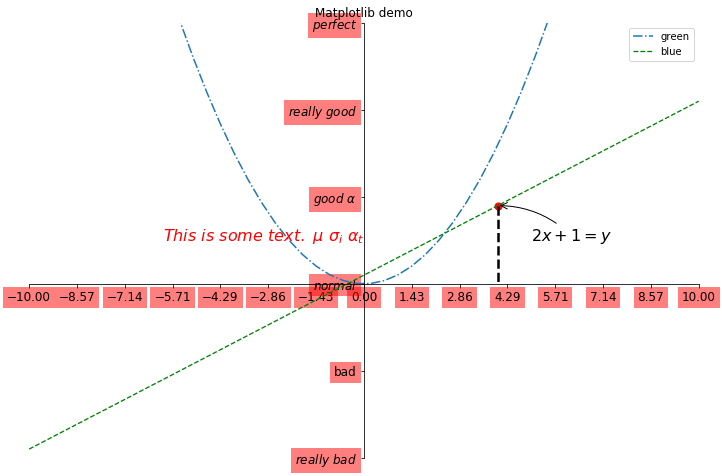

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# ------------------- 1.创建数据 -------------------- #
x = np.linspace(-10,10,50)
y1 = x*2+1
y2 = x**2
# ------------------- 2.绘图 -------------------- #
plt.figure(num = 1, figsize = (12,8))
l1, = plt.plot(x,y2, '-.')  # 为了后面进行图例显示，一定要加 ','
l2, =plt.plot(x,y1,color = 'green',linewidth = 1.3, linestyle = '--')

plt.title("Matplotlib demo")  # 标题
# plt.xlabel("x axis caption")  # x轴标签，由于会影响后面的显示，先注释掉
# plt.ylabel("y axis caption")  # y轴标签
# ------------------- 3.改变坐标轴范围 -------------------- #
plt.xlim(-10,10)  # 设置x轴范围
plt.ylim(-20,30)  # 设置y轴范围

# ------------------- 4.改变脚标 -------------------- #
# 替换x轴脚标
new_xticks = np.linspace(-10,10,15)  
plt.xticks(new_xticks)

# 替换y轴脚标 数字 ==> 文字
# 文字前后加 '$' 可以改变字体  "bad"作为对比
# '$' 前面加 'r' 使用了正则表达式
plt.yticks([-20,-10,0,10,20,30],
           [r'$really\ bad$','bad',r'$normal$',r'$good\ \alpha$',r'$really\ good$',r'$perfect$'])

# ------------------- 5.改变坐标轴 -------------------- #
# gca = 'get current axis' 获取当前坐标轴
ax = plt.gca()
# 改变 'spain' (脊柱，翻译出来怪怪的)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 将底部的'spine'设置为x轴
ax.xaxis.set_ticks_position('bottom')
# 将x轴移动到'data'为'0'的地方
ax.spines['bottom'].set_position(('data',0))

# 将左边的'spine'设置为y轴
ax.yaxis.set_ticks_position('left')
# 将y轴移动到'data'为'0'的地方
ax.spines['left'].set_position(('data',0))

# ------------------- 6.制作图例 -------------------- #
plt.legend(handles = [l1,l2], labels = ['green','blue'], loc = 'best') 

# ------------------- 7.添加注解 -------------------- #
x0 = 4
y0 = 2*x0 + 1
plt.scatter(x0, y0, s=50, color='r')  # 描述点
plt.plot([x0,x0],[y0,0],'k--',linewidth = 2.5)  # 描述一条垂线

# 方法一：
plt.annotate(r'$2x+1 = y$',xy = (x0,y0), 
             xycoords = 'data',
             xytext=(5,5), 
             fontsize = 16, 
             arrowprops = dict(arrowstyle = '->',connectionstyle = 'arc3,rad = .2'))

# 方法二：
plt.text(-6,5,r'$This\ is\ some\ text.\ \mu\ \sigma_i\ \alpha_t$',
         fontdict={'size':16,'color':'r'})

# ------------------- 8.设置坐标轴标注属性 -------------------- #
for label in ax.get_xticklabels()+ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor = 'red',  # 前景色 为了展示，选择红色
                        edgecolor = 'None',  # 边框
                        alpha = 0.5))  # 透明度

plt.show()

# Matplotlib 散点图
***
使用 scatter() 能够绘制散点图。

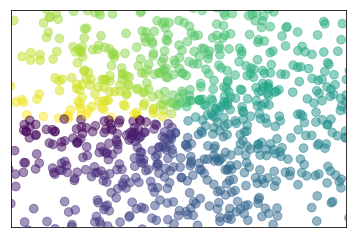

In [100]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)  # 计算颜色

plt.scatter(X,Y,s = 75, c = T, alpha = 0.5)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

plt.xticks(())
plt.yticks(())

plt.show()

# Matplotlib 柱状图
***
使用 bar() 能够绘制柱状图。

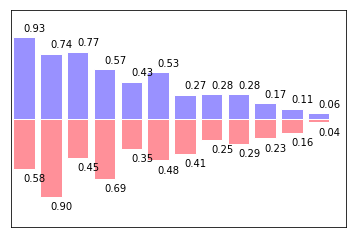

In [104]:
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

# 更改颜色
plt.bar(X, +Y1, facecolor='#9991ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9099', edgecolor='white')

# 添加数值标注
for x, y in zip(X, Y1):
    plt.text(x + 0.4, y + 0.05,
             '%.2f' % y, 
             ha='center', 
             va='bottom')

for x, y in zip(X, Y2):
    plt.text(x + 0.4, 
             -y - 0.05, 
             '%.2f' % y, 
             ha='center', 
             va='top')

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())

plt.show()

# Matplotlib 图片
***
使用 imshow() 显示图片。  
**[参数 interpolation 说明](https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html)**  
**[参数 origin 说明](http://matplotlib.org/examples/pylab_examples/image_origin.html)**

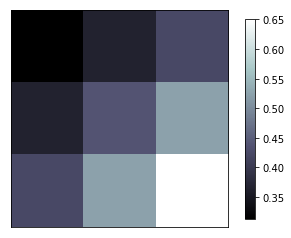

In [106]:

a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)

# 显示图片
plt.imshow(a, interpolation='nearest', cmap='bone', origin='upper')
plt.colorbar(shrink=.92)

plt.xticks(())
plt.yticks(())
plt.show()

# Matplotlib 3D显示
***
需要添加一个模块，才能顺利显示3D图片。

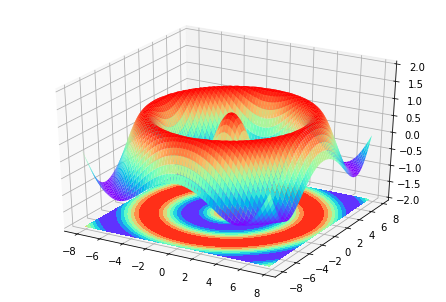

In [120]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
# 生成X , Y 的值
X = np.arange(-8, 8, 0.25)
Y = np.arange(-8, 8, 0.25)
X, Y = np.meshgrid(X, Y)
# 计算高度值
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.cos(R)

ax.plot_surface(X, Y, Z, 
                rstride = 1,  # 网格跨度
                cstride = 1,  # 颜色跨度
                cmap = 'rainbow')

# 添加等高线
ax.contourf(X,Y,Z,zdir = 'z',
            offset = -2,
            cmap = 'rainbow')

ax.set_zlim(-2, 2)

plt.show()

# Matplotlib Subplot多图显示
***
subplot() 可以建立多个子图，在每个子图中能够进行独立的显示。

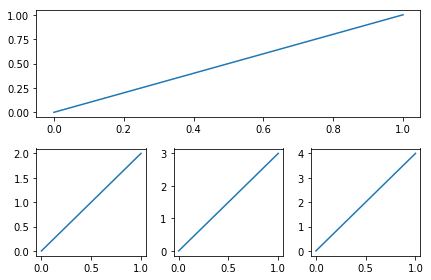

In [130]:
"""
# Example_1

plt.figure(figsize=(6, 4))
# plt.subplot(n_rows, n_cols, plot_num)
plt.subplot(2, 2, 1)
plt.plot([0, 1], [0, 1])

plt.subplot(222)
plt.plot([0, 2], [0, 1])

plt.subplot(223)
plt.plot([0, 1], [0, 3])

plt.subplot(224)
plt.plot([0, 4], [0, 1])

plt.tight_layout()
"""
"""
# Example_2
"""
plt.figure(figsize=(6, 4))

plt.subplot(2, 1, 1)
plt.plot([0, 1], [0, 1])

plt.subplot(234)
plt.plot([0, 1], [0, 2])

plt.subplot(235)
plt.plot([0, 1], [0, 3])

plt.subplot(236)
plt.plot([0, 1], [0, 4])


plt.tight_layout()
plt.show()

# Matplotlib Animation 动画
***
aimation 模块能够制作演示动画。

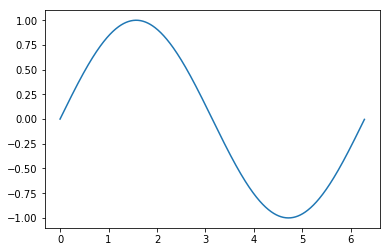

In [140]:
from matplotlib import animation as ani

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

def animate(i):
    line.set_ydata(np.sin(x+i/100))
    return line,

def init():
    line.set_ydata(np.sin(x))
    return line,

anima = ani.FuncAnimation(fig = fig,
                 func = animate,  # 自定义
                 frames = 100,  # 帧数
                 init_func = init,  # 自定义
                 interval = 20,  # 频率
                 blit = True)  # 是否更新整张图片


plt.show()

更多使用方法请参考官方文档。